In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [10]:
class Model():
  def __init__(self):
    pass

  def predict(self, x):
    predicted_labels = [self._predict(x) for x in x]
    return np.array(predicted_labels)

  def _predict(self, x):
    return "male"

  def accuracy(self, predicted, actual):
    return np.sum(predicted == actual) / len(actual)


In [11]:
df = pd.read_csv("faithful.csv")
#Old Faithful Geyser data (eruption duration, waiting time in days)
#from: https://www.kaggle.com/datasets/janithwanni/old-faithful?resource=download
df.head(5)

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


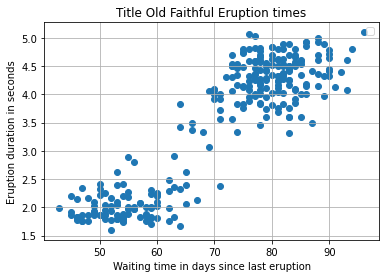

In [17]:
plt.figure()
plt.scatter(df["waiting"], df["eruptions"])
plt.xlabel("Waiting time in days since last eruption")
plt.ylabel("Eruption duration in seconds")
plt.title("Title Old Faithful Eruption times")
plt.grid()
plt.legend()
plt.show()